# 回归模型

## 1. 核心概念

### 1.1 什么是回归分析？

回归分析用于**量化**变量之间的关联程度。

考虑人均收入和消费支出两个变量，经济理论和常识指出，收入增长会刺激消费，但如何从定量的角度分析这个问题？通过建立回归模型，可以度量当人均收入增长1个单位时，消费支出会增长多少个单位。

经典回归方程：

$$Y_i = \beta_0 + \beta_1*X_{1i} + \beta_2*X_{2i} + \dots + \beta_k*X_{ki} + \epsilon_i$$

* $Y$: 被解释变量，也成为目标变量，要求是连续性数值变量
* $X_k$: 解释变量，也成为自变量，特征或预测变量
* $\beta_0$: 截距项
* $\beta_k$: 斜率系数，代表$X_{k}$变动1单位，$Y$变动$\beta_k$个单位
* $\epsilon$: 误差项/随机干扰项/高斯白噪音，是无法被预测变量解释的部分，代表随机冲击，一般假设误差项服从正态分布

方程的含义是显而易见的，我们试图用$X_1, X_2, \dots, X_k$来解释或预测$Y$.

### 1.2 如何估计方程系数？

最常用的方式是最小二乘估计(OLS)，目标是最小化残差平方和。

$$min \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

$$min \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \sum_{j=1}^{k}\hat{\beta_j}x_{ij})^2$$

$y_i$是第i个真实的观测值，$\hat{y_i}$是回归方程的拟合值，$\hat{\beta_i}$是估计的回归系数。

### 1.3 建立回归模型的经典步骤

* 查阅文献，建立理论模型
* 确定模型，选择解释变量和函数形式
* 对参数的符号做出假设
* 收集和整理数据
* 估计和评价方程
* 报告结果

关于如何创建回归模型，并没有统一的范式，上述步骤是计量经济学家多年总结的经验。

难点在于构建理论模型，现实中很多问题没有理论依据，进一步说，查阅文献需要大量时间，商业项目往往有截止日期，为了得到更好的预测结果，有时候不得不借助优化方法来选择“最优”的预测变量和函数。

### 1.4 古典假设

回归模型背后有一系列假设，它们保证了最小二乘估计量是“最优”估计量。

1. 回归模型(对系数)是线性的，无设定偏误，包含一个误差项$\epsilon$。
2. 总体误差项的均值为零。
3. 误差项与解释变量不相关。
4. 误差项观测值相互独立(无序列相关)。
5. 误差项方差是常数(同方差/无异方差)。
6. 没有完全的多重共线性。
7. 误差项服从均值为零，方差为常数的正态分布。

如果一个或多个假设被违背，估计量就不是最优的，这时候可能需要转换变量或使用其它估计方法。

## 2. 简单线性回归

最简单的线性回归只有一个预测变量，通常用以下方程描述：

$$Y_i = \beta_0 + \beta_1 * X_i + \epsilon_i$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

创建虚拟数据集。

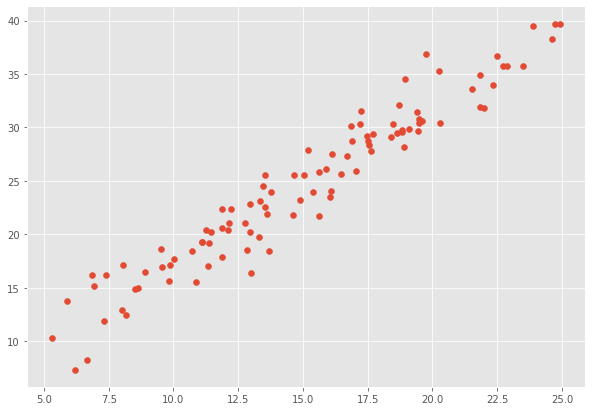

In [8]:
np.random.seed(123)

# 创建虚拟数据集
obs = 100  # 100个观测值
X = np.random.uniform(5, 25, obs)  # 假设预测变量服从均匀分布
e = np.random.normal(0, 2, obs)  # 假设误差项服从正态分布
a = 2  # 截距系数
b = 1.5  # 斜率系数

Y = a + b * X + e

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X, Y)

用sklearn实现线性回归，调用LinearRegression接口类创建回归模型。

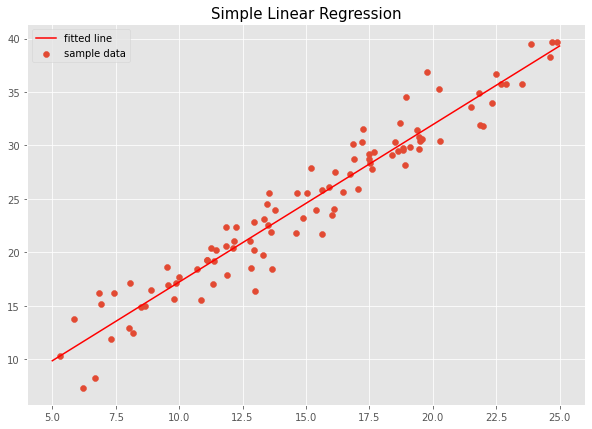

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 创建回归模型对象
model = LinearRegression(fit_intercept=True)

# 拟合数据
# fit方法要求特征是二维数组，先用reshape重排X的结构
X_mat = X.reshape((len(X), 1))
model.fit(X_mat, Y)

# 绘制拟合曲线
xfit = np.linspace(5, 25, 100)
yfit = model.predict(xfit.reshape((len(xfit), 1)))

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X, Y, label="sample data")
ax.plot(xfit, yfit, "-r", label = "fitted line")
ax.set_title("Simple Linear Regression", fontsize=15)
ax.legend()

查看截距系数和斜率系数。

In [16]:
print(model.coef_)
print(model.intercept_)

[1.47309535]
2.4744181441792428


评估回归模型性能是很重要的步骤，对于回归问题，主要是对比观测值和拟合值的偏差，常用指标有：

* MAE: 平均绝对误差
* MSE: 均方误差
* RMSE: 均方根误差
* $R^2$: 可决系数，衡量拟合优度

sklearn.metrics提供了一系列评估函数。

In [19]:
yfit = model.predict(X_mat)

mae = metrics.mean_absolute_error(Y, yfit)
mse = metrics.mean_squared_error(Y, yfit)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y, yfit)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f} ")
print(f"R2: {r2:.3f}")

MAE: 1.518
MSE: 3.829
RMSE: 1.957 
R2: 0.932


## 3. 多元线性回归

多元线性回归是简单线性回归的扩展，预测变量的数量从1个变为多个。

以波士顿房价(boston)数据集为例，说明如何使用多元回归模型。

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
plt.style.use("ggplot")

加载boston数据集，包含506个观测值和13个特征，目标是预测房屋价格。

In [25]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["target"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


创建多元线性回归模型，预测房屋价格。

In [26]:
# 划分训练集和检验集，采用80/20划分
# 在训练集拟合回归模型，在检验集评估预测能力
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=123)

# 创建回归模型对象
model = LinearRegression()

# 拟合数据
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型性能，用可决系数评估拟合优度，均方误差评估预测精度
r2_train = metrics.r2_score(y_train, model.predict(X_train))
r2_test = metrics.r2_score(y_test, y_pred)
mse_train = metrics.mean_squared_error(y_train, model.predict(X_train))
mse_test = metrics.mean_squared_error(y_test, y_pred)

print("Training R2 = %.4f" % r2_train)
print("Test R2 = %.4f" % r2_test)
print("Traing MSE = %.4f" % mse_train)
print("Test MSE = %.4f" % mse_test)

Training R2 = 0.7559
Test R2 = 0.6592
Traing MSE = 20.6771
Test MSE = 28.1925


我们同时计算了训练集和检验集的可决系数和均方误差，一般情况下模型在训练阶段有过拟合的倾向，检验集的预测精度往往会下降。与训练集相比，检验集的拟合优度从76%减少到66%，MSE也明显上升。

Text(0, 0.5, 'predicted values')

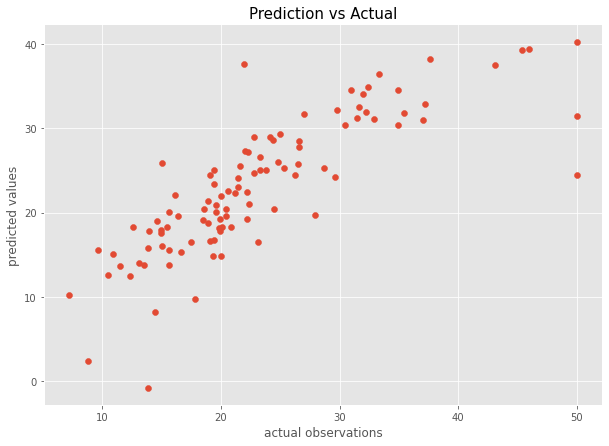

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(y_test, y_pred)
ax.set_title("Prediction vs Actual", fontsize=15)
ax.set_xlabel("actual observations")
ax.set_ylabel("predicted values")

## 4. 多项式回归

线性回归模型假设变量间的关系是线性的，然而现实的情况是大多数时候变量的关系都是非线性的，这时候就需要使用多项式回归。

多项式回归一般采用下列方程表述：

$$Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i}^2 + ... + \beta_kX_{ki}^k + \epsilon_i$$

方程中$X$的阶数大于1，但方程仍然是线性的，在回归模型中线性是相对于系数而言，预测变量可以采取任何形式，只需要用$Z=X^k$替代高阶项就可以继续使用OLS估计线性回归方程。

### 4.1 如何创建多项式特征？

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# 假设3行2列的特征矩阵
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

将特征矩阵从$(X_1, X_2)$转化为$(X_1, X_2, X_1^2, X_1X_2, X_2^2)$

In [10]:
poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

### 4.2 用多项式方程拟合非线性关系

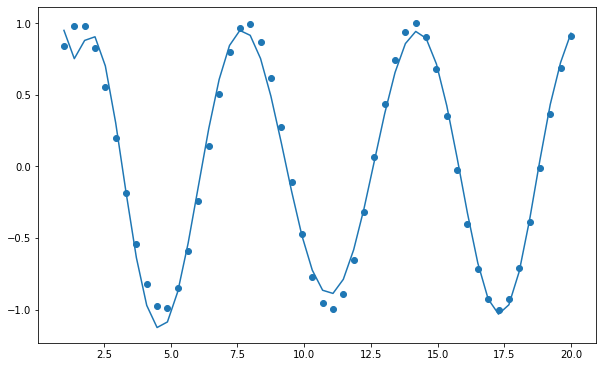

In [11]:
# 生成数据，假设X和Y存在非线性关系：y = sin(x)
x = np.linspace(1, 20, 50)
y = np.sin(x)

# 创建多项式特征
# 尝试用不同阶数拟合数据，阶数越高拟合越好(过度拟合)
poly = PolynomialFeatures(10, include_bias=False)
x_transform = poly.fit_transform(x.reshape(-1, 1))

# 创建模型对象
model = LinearRegression()

# 拟合数据
model.fit(x_transform, y)

# 预测
yfit = model.predict(x_transform)

# 观察拟合程度
fig, ax = plt.subplots(figsize=(10, 6.18))
ax.scatter(x, y)
ax.plot(x, yfit)

### 4.3 应用多项式回归

让我们回归到波士顿房价的案例，出于学习的目的，先忽略变量之间的真实关系，直接创建多项式特征并拟合线性回归模型，我们预期训练集的拟合优度将大幅上升。

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 1. 将数据标准化
# 2. 创建多项式特征
# 3. 拟合线性回归模型
# 为了将数据预处理和建模结合到一起，我们使用管道'Pipe'
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# 拟合数据
pipeline.fit(X_train, y_train)

# 预测
y_pred = pipeline.predict(X_test)

# 评估模型性能
r2_train = r2_score(y_train, pipeline.predict(X_train))
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Training R2 = %.4f" % r2_train)
print("Test R2 = %.4f" % r2_test)
print("Traing MSE = %.4f" % mse_train)
print("Test MSE = %.4f" % mse_test)

Training R2 = 0.9336
Test R2 = 0.8220
Traing MSE = 5.6286
Test MSE = 14.7244


与多元线性回归相比，多项式回归的拟合优度大幅上升，训练集的可决系数由76%上升到93%，均方误差从20.7减少到5.63，然而多项式回归明显过度拟合了数据，在检验集中均方误差从5.63大幅上升至14.7.

## 5. 正则化

正则化(Regularization)是一种降低模型复杂度的技术，主要目的是避免过度拟合。

* [岭回归和罗素回归](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)
* [线性模型的正则化](https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2)

### 5.1 岭回归

岭回归(Ridge Regression)是最常见的正则化技术，也被称为L2正则化。

普通最小二乘估计的目标是最小化残差平方和，岭回归在优化目标中加入惩罚项，对估计系数做出限制，如下式：

$$\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \sum_{j=1}^{k}\hat{\beta_j}x_{ij})^2 + \alpha\sum_{j=1}^{k}\hat{\beta_j}^2$$

$\alpha$控制惩罚力度，$\alpha$越大惩罚力度越大，估计系数的取值越小，当$\alpha=0$，岭回归就是普通的线性回归。

In [13]:
from sklearn.linear_model import Ridge

# 创建管道，将数据预处理和建模结合在一起
# 这次我们将用岭回归而不是普通的线性回归拟合数据
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge(alpha=100)  # 尝试用不同的alpha
)

# 拟合数据
pipeline.fit(X_train, y_train)

# 预测
y_pred = pipeline.predict(X_test)

# 评估模型性能
r2_train = r2_score(y_train, pipeline.predict(X_train))
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Training R2 = %.4f" % r2_train)
print("Test R2 = %.4f" % r2_test)
print("Traing MSE = %.4f" % mse_train)
print("Test MSE = %.4f" % mse_test)

Training R2 = 0.8846
Test R2 = 0.7689
Traing MSE = 9.7759
Test MSE = 19.1187


与多元线性回归相比，岭回归的训练集的拟合优度有所下降，与预期相符，但检验集的拟合优度和预测精度仍然显著低于训练集，这说明即便岭回归限制了模型的复杂度，仍然没有从根本上解决过拟合的问题。

### 5.2 罗素回归

罗素回归(Lasso Regression)也被称为L1正则化，最小化目标函数：

$$\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \sum_{j=1}^{k}\hat{\beta_j}x_{ij})^2 + \alpha\sum_{j=1}^{k}|\hat{\beta_j}|$$

* $\alpha\sum_{j=1}^{k}|\hat{\beta_j}|$是惩罚项。
* $\alpha$决定惩罚力度，取值越大惩罚力度越大，估计系数取值范围越小。
* 随着惩罚力度加大，部分不重要的估计系数会变为零，因此罗素回归常用于特征选择。

罗素回归与岭回归对比？

1. 两种模型都属于正则化技术，目的是降低模型复杂度。
2. 罗素回归可用于特征选择，岭回归不行。

In [14]:
from sklearn.linear_model import Lasso

pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Lasso(alpha=1)  # 尝试用不同的alpha
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2_train = r2_score(y_train, pipeline.predict(X_train))
r2_test = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Training R2 = %.4f" % r2_train)
print("Test R2 = %.4f" % r2_test)
print("Traing MSE = %.4f" % mse_train)
print("Test MSE = %.4f" % mse_test)

Training R2 = 0.7988
Test R2 = 0.5997
Traing MSE = 17.0416
Test MSE = 33.1200


如何优化模型？

简单线性回归，岭回归，罗素回归模型的预测能力都低于预期。

1. EDA，特征工程 --> 添加/减少变量
2. 超参数优化
3. 逐步回归